In [1]:
from bokeh.io import output_notebook, push_notebook
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider, ColumnDataSource, CDSView, GroupFilter
from bokeh.plotting import reset_output



import numpy as np
import pandas as pd
import missingno as msno




In [2]:
bats_man=pd.read_csv('./Batsman_Data.csv')
player_data=pd.read_csv('./WC_players.csv')
match_results=pd.read_csv('./ODI_Match_Result.csv')

# Match Results Processing

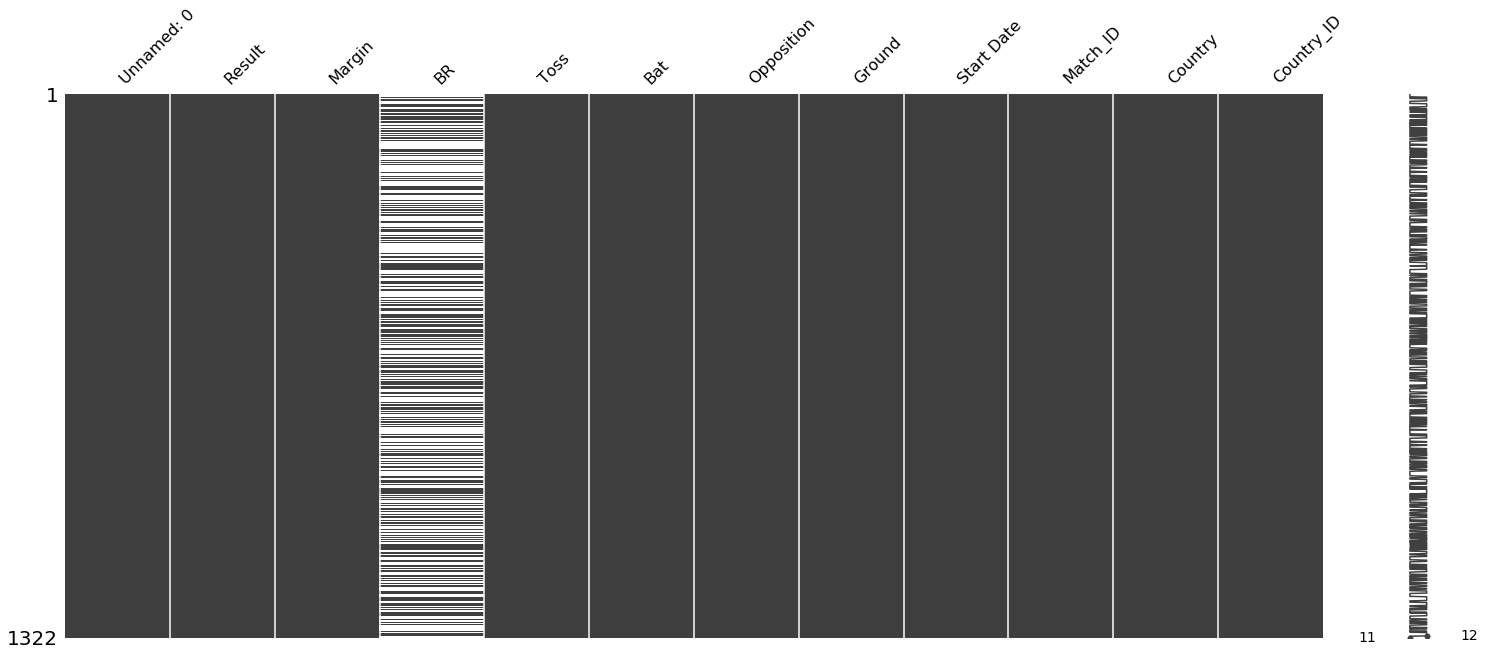

In [3]:
msno.matrix(match_results)

In [4]:
match_results.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [5]:
match_results.drop(columns=['BR','Unnamed: 0'],inplace=True)

In [6]:
match_results['Opposition']=match_results['Opposition'].str.replace('v ','').str.strip()
match_results['Match_ID']=match_results['Match_ID'].str.replace('ODI #','').str.strip()
match_results['Start Date'] = pd.to_datetime(match_results['Start Date'])
match_results['Year']=match_results['Start Date'].apply(lambda x : x.year)

In [7]:
match_results.Country.unique()

array(['Pakistan', 'India', 'SriLanka', 'Australia', 'England',
       'SouthAfrica', 'Newzealad', 'WestIndies', 'Afghanistan',
       'Bangladesh'], dtype=object)

In [8]:
match_results_india=match_results[match_results['Country']=='India']

In [9]:
match_results_india.head()

,Result,Margin,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Year
1,lost,85 runs,won,2nd,Pakistan,Kolkata,2013-01-03,3315,India,6,2013
3,won,10 runs,won,1st,Pakistan,Delhi,2013-01-06,3316,India,6,2013
6,lost,9 runs,lost,2nd,England,Rajkot,2013-01-11,3318,India,6,2013
10,won,127 runs,won,1st,England,Kochi,2013-01-15,3320,India,6,2013
14,won,7 wickets,won,2nd,England,Ranchi,2013-01-19,3322,India,6,2013


In [10]:
print(match_results_india.Match_ID.nunique())

160


In [11]:
print(match_results_india.Match_ID.unique())

['3315' '3316' '3318' '3320' '3322' '3327' '3329' '3363' '3368' '3372'
 '3376' '3377' '3380' '3382' '3383' '3387' '3388' '3395' '3397' '3399'
 '3402' '3403' '3419' '3420' '3421' '3422' '3422a' '3424' '3428' '3436'
 '3437' '3439' '3442' '3443' '3444' '3456' '3458' '3462' '3465' '3467'
 '3474' '3476' '3479' '3483' '3497' '3498' '3499' '3513a' '3517' '3520'
 '3523' '3525' '3531' '3533' '3534a' '3535' '3535a' '3539' '3540' '3543'
 '3544' '3547' '3582' '3586' '3592' '3595' '3602' '3610' '3618' '3625'
 '3631' '3636' '3641' '3645' '3658' '3660' '3661' '3662' '3665' '3667'
 '3689' '3692' '3695' '3698' '3700' '3723' '3724' '3725' '3726' '3727'
 '3742' '3744' '3746' '3796' '3797' '3798' '3799' '3800' '3819' '3821'
 '3824' '3878' '3882' '3886' '3891' '3894' '3895' '3896' '3898' '3900'
 '3902' '3905' '3906' '3907' '3908' '3909' '3910' '3912' '3914' '3917'
 '3919' '3928' '3931' '3932' '3939' '3941' '3942' '3969' '3970' '3971'
 '3973' '3976' '3978' '4014' '4016' '4018' '4039' '4040' '4042' '4044'
 '

In [12]:
match_results_india[match_results_india.Match_ID.isin(['3422a','3422','3513a','3534a'])]

,Result,Margin,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Year
173,n/r,-,won,2nd,Australia,Ranchi,2013-10-23,3422,India,6,2013
175,aban,-,-,-,Australia,Cuttack,2013-10-26,3422a,India,6,2013
337,aban,-,-,-,England,Bristol,2014-08-25,3513a,India,6,2014
373,canc,-,-,-,West Indies,Visakhapatnam,2014-10-14,3534a,India,6,2014


In [13]:
match_results_india.Result.unique()

array(['lost', 'won', 'n/r', 'aban', 'tied', 'canc'], dtype=object)

In [14]:
match_results_india=match_results_india[match_results_india['Result'].isin(['lost', 'won','tied'])]

In [15]:
match_results_india.Match_ID.unique()

array(['3315', '3316', '3318', '3320', '3322', '3327', '3329', '3363',
       '3368', '3372', '3376', '3377', '3380', '3382', '3383', '3387',
       '3388', '3395', '3397', '3399', '3402', '3403', '3419', '3420',
       '3421', '3424', '3428', '3436', '3437', '3439', '3442', '3443',
       '3456', '3458', '3462', '3465', '3467', '3474', '3476', '3479',
       '3483', '3497', '3498', '3517', '3520', '3523', '3525', '3531',
       '3533', '3535', '3539', '3540', '3543', '3544', '3547', '3582',
       '3586', '3595', '3602', '3610', '3618', '3625', '3631', '3636',
       '3641', '3645', '3658', '3660', '3661', '3662', '3665', '3667',
       '3689', '3692', '3695', '3698', '3700', '3723', '3724', '3725',
       '3726', '3727', '3742', '3744', '3746', '3796', '3797', '3798',
       '3799', '3800', '3819', '3821', '3824', '3878', '3882', '3886',
       '3891', '3894', '3896', '3898', '3900', '3902', '3905', '3906',
       '3907', '3908', '3909', '3910', '3912', '3914', '3917', '3919',
      

In [16]:
print(match_results_india.shape)
print(match_results_india.Opposition.unique())

(151, 11)
['Pakistan' 'England' 'South Africa' 'West Indies' 'Sri Lanka' 'Zimbabwe'
 'Australia' 'New Zealand' 'Bangladesh' 'Afghanistan' 'U.A.E.' 'Ireland'
 'Hong Kong']


In [17]:
match_results_india=match_results_india.reset_index()

In [18]:
match_results_india.head()

,index,Result,Margin,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Year
0,1,lost,85 runs,won,2nd,Pakistan,Kolkata,2013-01-03,3315,India,6,2013
1,3,won,10 runs,won,1st,Pakistan,Delhi,2013-01-06,3316,India,6,2013
2,6,lost,9 runs,lost,2nd,England,Rajkot,2013-01-11,3318,India,6,2013
3,10,won,127 runs,won,1st,England,Kochi,2013-01-15,3320,India,6,2013
4,14,won,7 wickets,won,2nd,England,Ranchi,2013-01-19,3322,India,6,2013


In [30]:
match_results_india[match_results_india['Year']==2018].groupby(['Opposition','Result'])['index'].count().reset_index()

,Opposition,Result,index
0,Afghanistan,tied,1
1,Bangladesh,won,2
2,England,lost,2
3,England,won,1
4,Hong Kong,won,1
5,Pakistan,won,2
6,South Africa,lost,1
7,South Africa,won,5
8,West Indies,lost,1
9,West Indies,tied,1


In [21]:
temp_source.head()

,index,Result,Margin,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Year
0,1,lost,85 runs,won,2nd,Pakistan,Kolkata,2013-01-03,3315,India,6,2013
1,3,won,10 runs,won,1st,Pakistan,Delhi,2013-01-06,3316,India,6,2013
2,6,lost,9 runs,lost,2nd,England,Rajkot,2013-01-11,3318,India,6,2013
3,10,won,127 runs,won,1st,England,Kochi,2013-01-15,3320,India,6,2013
4,14,won,7 wickets,won,2nd,England,Ranchi,2013-01-19,3322,India,6,2013


In [22]:
temp_source.groupby(['Opposition','Result'])['index'].count().reset_index()

,Opposition,Result,index
0,Australia,lost,2
1,Australia,won,3
2,England,lost,2
3,England,won,4
4,Pakistan,lost,1
5,Pakistan,won,2
6,South Africa,lost,2
7,South Africa,won,1
8,Sri Lanka,lost,1
9,Sri Lanka,won,3


# bats_man

In [405]:
bats_man.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [406]:
bats_man.drop(columns=['Unnamed: 0'],inplace=True)

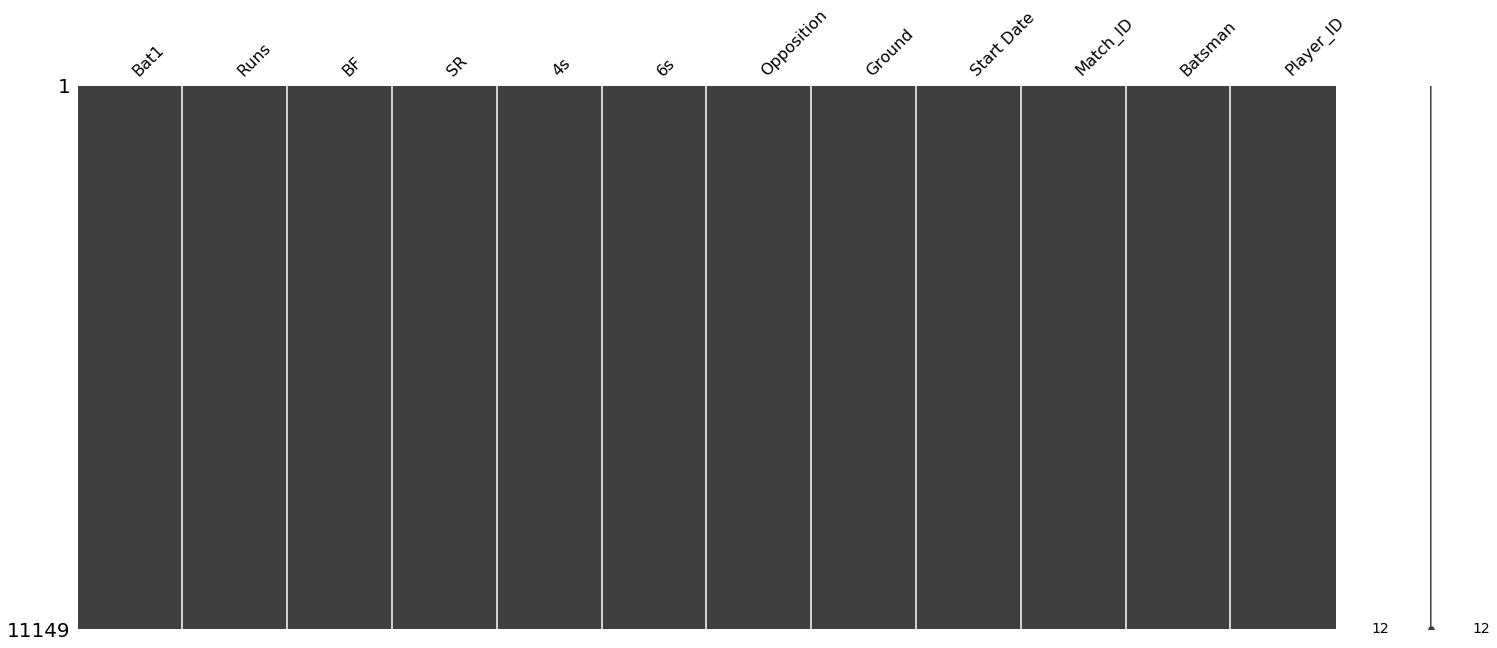

In [407]:
msno.matrix(bats_man)

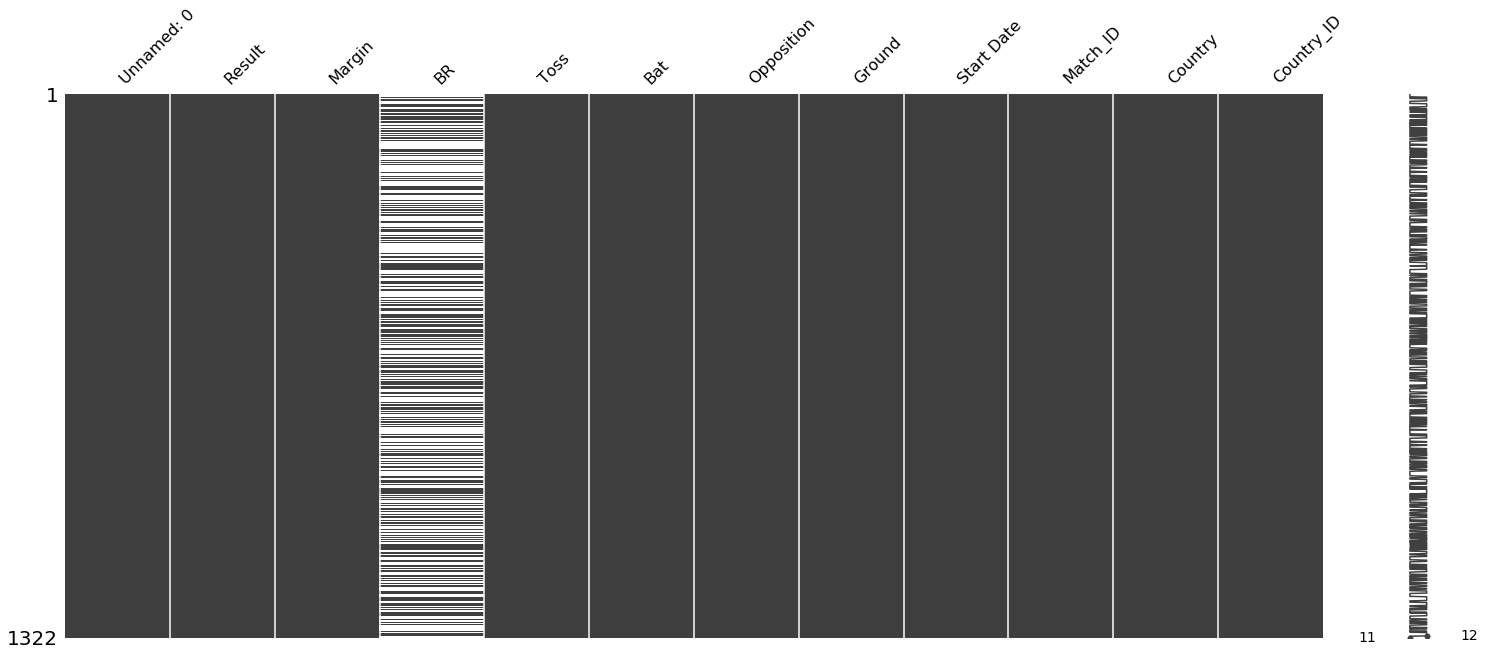

In [408]:
msno.matrix(match_results)

In [409]:
bats_man.head()

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [410]:
bats_man.Bat1.unique()

array(['DNB', '0*', '1*', '0', '1', '2*', '4*', '3', '7*', '8', '7', '3*',
       '10', 'TDNB', '20*', '26', '23*', '11*', '5*', '2', '5', '12',
       '20', '49', '92*', '25', '22', '11', '40*', '29', '53', '37', '34',
       '41', '42*', '59*', '9', '43', '18', '4', '6*', '46', '19', '16',
       '64*', '24', '27*', '13', '12*', '24*', '9*', '14*', '8*', '26*',
       '15*', '6', '21', '34*', '44', '10*', '19*', '31*', '27', '40',
       '25*', '13*', '14', '148', '47', '33', '35', '176*', '76', '31',
       '64', '66', '17', '101', '15', '71', '48*', '81', '51', '72', '23',
       '35*', '49*', '32', '123*', '95', '146*', '108*', '170', '109',
       '30', '87', '74', '127', '36', '38', '52', '125', '106', '94',
       '104*', '28*', '45*', '39', '79', '73', '67', '86', '60', '28',
       '100*', '72*', '55', '70', '54', '59', '50', '51*', '124', '102',
       '61', '33*', '58*', '42', '152', '85', '62', '84', '103', '140',
       '119', '153*', '112*', '152*', '60*', '132*', '99', 

In [411]:
bats_man.groupby(['Bat1'])['Player_ID'].count()

Bat1
0          655
0*         145
1          338
1*         100
10         148
10*         30
100         11
100*        11
101         17
101*         5
102         17
102*         9
103         10
103*         4
104          8
104*         4
105          9
105*         3
106         12
106*         2
107         13
107*         2
108          6
108*         4
109         11
109*         1
11         168
11*         26
110          9
110*         8
          ... 
87          14
87*          5
88           8
88*          4
89           6
89*          3
9          165
9*          32
90          13
90*          4
91           6
91*          6
92          11
92*          4
93           9
93*          1
94          10
95          15
95*          3
96           7
96*          2
97           6
97*          4
98           7
99           9
99*          1
DNB       2043
TDNB       182
absent       3
sub          3
Name: Player_ID, Length: 323, dtype: int64

In [412]:
bats_man.shape

(11149, 12)

In [413]:
bats_man=bats_man[bats_man['Bat1']!='DNB']
bats_man=bats_man[bats_man['Bat1']!='TDNB']
bats_man=bats_man[bats_man['Bat1']!='absent']
bats_man=bats_man[bats_man['Bat1']!='sub']

In [414]:
bats_man.shape

(8918, 12)

In [415]:
bats_man.head()

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5,0*,0,8,0.00,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
6,0*,0,0,-,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,1*,1,3,33.33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
10,0*,0,2,0.00,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619
11,0,0,2,0.00,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619


In [416]:
bats_man['status']=np.where(bats_man['Bat1'].str.contains('*',regex=False),'not-out','out')

In [417]:
bats_man.head()

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,status
5,0*,0,8,0.00,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619,not-out
6,0*,0,0,-,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619,not-out
9,1*,1,3,33.33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619,not-out
10,0*,0,2,0.00,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619,not-out
11,0,0,2,0.00,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619,out


In [418]:
bats_man.drop(columns=['Bat1'],inplace=True)

In [419]:
bats_man.head()

,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,status
5,0,8,0.00,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619,not-out
6,0,0,-,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619,not-out
9,1,3,33.33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619,not-out
10,0,2,0.00,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619,not-out
11,0,2,0.00,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619,out


In [420]:
player_data.head()

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan


In [421]:
player_data.dtypes

Player     object
ID          int64
Country    object
dtype: object

In [422]:
# Check if there are any players that are in bats_men but not in player data
bats_man[~(bats_man['Player_ID'].isin(list(player_data['ID'])))].shape

(44, 12)

In [423]:
print(bats_man[~(bats_man['Player_ID'].isin(list(player_data['ID'])))]['Player_ID'].nunique())
print(bats_man[~(bats_man['Player_ID'].isin(list(player_data['ID'])))]['Player_ID'].unique())

1
[49619]


In [424]:
bats_man[bats_man['Player_ID']==49619].head()


,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,status
5,0,8,0.00,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619,not-out
6,0,0,-,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619,not-out
9,1,3,33.33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619,not-out
10,0,2,0.00,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619,not-out
11,0,2,0.00,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619,out


In [425]:
player_data[player_data['Player']=='Oshane Thomas']


,Player,ID,Country
151,Oshane Thomas,914567,WestIndies


In [426]:
player_data['ID']=np.where(player_data['Player']=='Oshane Thomas',49619,player_data['ID'])



In [427]:
bats_man[~(bats_man['Player_ID'].isin(list(player_data['ID'])))]

,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,status
82,0,2,0.00,0,0,v India,Thiruvananthapuram,1 Nov 2018,ODI # 4064,Oshane Thomas,914567,out
83,0,2,0.00,0,0,v Bangladesh,Dhaka,9 Dec 2018,ODI # 4071,Oshane Thomas,914567,not-out
88,0,1,0.00,0,0,v England,St George's,27 Feb 2019,ODI # 4099,Oshane Thomas,914567,out


In [428]:
bats_man['Player_ID']=np.where(bats_man['Batsman']=='Oshane Thomas',49619,bats_man['Player_ID'])

In [429]:
bats_man[~(bats_man['Player_ID'].isin(list(player_data['ID'])))]

,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,status


In [430]:
bats_man=bats_man.merge(player_data,how='inner',left_on='Player_ID',right_on='ID')

In [431]:
bats_man.head()

,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,status,Player,ID,Country
0,0,8,0.00,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619,not-out,Oshane Thomas,49619,WestIndies
1,0,0,-,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619,not-out,Oshane Thomas,49619,WestIndies
2,1,3,33.33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619,not-out,Oshane Thomas,49619,WestIndies
3,0,2,0.00,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619,not-out,Oshane Thomas,49619,WestIndies
4,0,2,0.00,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619,out,Oshane Thomas,49619,WestIndies


In [432]:
bats_man['Start Date'].dtype

dtype('O')

In [433]:
bats_man['Start Date'] = pd.to_datetime(bats_man['Start Date'])

In [436]:
bats_man['Year']=bats_man['Start Date'].apply(lambda x : x.year)
bats_man['Match_ID']=bats_man['Match_ID'].str.replace('ODI #','').str.strip()
bats_man['Opposition']=bats_man['Opposition'].str.replace('v ','').str.strip()

In [437]:
bats_man.head()

,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,status,Player,ID,Country,Year
0,0,8,0.00,0,0,India,Dhaka,2010-01-10,2941,Oshane Thomas,49619,not-out,Oshane Thomas,49619,WestIndies,2010
1,0,0,-,0,0,England,The Oval,2011-06-28,3165,Oshane Thomas,49619,not-out,Oshane Thomas,49619,WestIndies,2011
2,1,3,33.33,0,0,England,Nottingham,2011-07-06,3169,Oshane Thomas,49619,not-out,Oshane Thomas,49619,WestIndies,2011
3,0,2,0.00,0,0,Australia,Pallekele,2011-08-10,3175,Oshane Thomas,49619,not-out,Oshane Thomas,49619,WestIndies,2011
4,0,2,0.00,0,0,Pakistan,Dubai (DSC),2011-11-11,3212,Oshane Thomas,49619,out,Oshane Thomas,49619,WestIndies,2011


In [444]:
bats_man[bats_man['Match_ID']=='3165']

,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,status,Player,ID,Country,Year
1,0,0,-,0,0,England,The Oval,2011-06-28,3165,Oshane Thomas,49619,not-out,Oshane Thomas,49619,WestIndies,2011
861,26,15,173.33,4,1,England,The Oval,2011-06-28,3165,Lasith Malinga,49758,out,Lasith Malinga,49758,SriLanka,2011
963,9,15,60.00,0,0,England,The Oval,2011-06-28,3165,Jeevan Mendis,49700,out,Jeevan Mendis,49700,SriLanka,2011
1407,16,16,100.00,3,0,England,The Oval,2011-06-28,3165,Angelo Mathews,49764,out,Angelo Mathews,49764,SriLanka,2011
6287,45,35,128.57,6,0,Sri Lanka,The Oval,2011-06-28,3165,Eoin Morgan,24598,out,Eoin Morgan (c),24598,England,2011


In [439]:
match_results.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [441]:
match_results.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Year
0,418,won,85 runs,NaN,lost,1st,India,Kolkata,2013-01-03,3315,Pakistan,7,2013
1,692,lost,85 runs,NaN,won,2nd,Pakistan,Kolkata,2013-01-03,3315,India,6,2013
2,419,lost,10 runs,NaN,lost,2nd,India,Delhi,2013-01-06,3316,Pakistan,7,2013
3,693,won,10 runs,NaN,won,1st,Pakistan,Delhi,2013-01-06,3316,India,6,2013
4,121,lost,107 runs,NaN,lost,2nd,Australia,Melbourne,2013-01-11,3317,SriLanka,8,2013


(1322, 13)

(759, 13)

In [310]:
bats_man['Country'].unique()

array(['WestIndies', 'SriLanka', 'SouthAfrica', 'Pakistan', 'NewZealand',
       'India', 'England', 'Bangladesh', 'Australia', 'Afghanistan'],
      dtype=object)

In [311]:
bats_man['Opposition'].unique()

array(['India', 'Bangladesh', 'England', 'Ireland', 'Pakistan',
       'Australia', 'New Zealand', 'Zimbabwe', 'South Africa', 'U.A.E.',
       'Sri Lanka', 'Scotland', 'Afghanistan', 'P.N.G.', 'Canada',
       'Netherlands', 'Kenya', 'Asia XI', 'West Indies', 'Hong Kong',
       'Bermuda', 'Africa XI'], dtype=object)

In [312]:
np.sort(bats_man['Year'].unique())

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [313]:
bats_man.shape

(8874, 16)

In [314]:
bats_man=bats_man[bats_man['Year'].isin([2013, 2014, 2015, 2016, 2017, 2018, 2019])]

In [315]:
bats_man.shape

(6241, 16)

In [456]:
match_results.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [457]:
match_results['Opposition']=match_results['Opposition'].str.replace('v ','').str.strip()
match_results['Match_ID']=match_results['Match_ID'].str.replace('ODI #','').str.strip()
match_results['Start Date'] = pd.to_datetime(match_results['Start Date'])
match_results['Year']=match_results['Start Date'].apply(lambda x : x.year)

In [458]:
np.sort(match_results['Year'].unique())


array([2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [459]:
match_results['Match_ID'].unique()


array(['3315', '3316', '3317', '3318', '3319', '3320', '3321', '3322',
       '3323', '3324', '3325', '3326', '3327', '3328', '3329', '3330',
       '3331', '3332', '3333', '3334', '3335', '3336', '3337', '3338',
       '3339', '3340', '3341', '3342', '3343', '3346', '3347', '3348',
       '3349', '3350', '3351', '3352', '3353', '3354', '3355', '3356',
       '3356a', '3357', '3358', '3359', '3360', '3361', '3362', '3363',
       '3364', '3365', '3366', '3367', '3368', '3369', '3370', '3371',
       '3372', '3373', '3374', '3375', '3376', '3377', '3378', '3380',
       '3382', '3383', '3385', '3387', '3388', '3389', '3390', '3391',
       '3392', '3393', '3394', '3395', '3396', '3397', '3398', '3399',
       '3400', '3401', '3402', '3403', '3404', '3406', '3408', '3409',
       '3410', '3410a', '3412', '3414', '3415', '3416', '3417', '3418',
       '3419', '3420', '3421', '3422', '3422a', '3423', '3424', '3425',
       '3426', '3427', '3428', '3429', '3430', '3431', '3432', '3433',
   

In [464]:
print(match_results['Match_ID'].nunique())
print(bats_man['Match_ID'].nunique())

743
1844


In [462]:
match_results.head(2)

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Year
0,418,won,85 runs,NaN,lost,1st,India,Kolkata,2013-01-03,3315,Pakistan,7,2013
1,692,lost,85 runs,NaN,won,2nd,Pakistan,Kolkata,2013-01-03,3315,India,6,2013


In [323]:
match_results=match_results[['Result','Match_ID']]

In [324]:
bats_man=bats_man.merge(match_results,how='inner',left_on='Match_ID',right_on='Match_ID')

In [325]:
bats_man.head()

,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,status,Player,ID,Country,Year,Result
0,0,2,0.00,0,0,India,Thiruvananthapuram,2018-11-01,4064,Oshane Thomas,914567,out,Oshane Thomas,914567,WestIndies,2018,lost
1,0,2,0.00,0,0,India,Thiruvananthapuram,2018-11-01,4064,Oshane Thomas,914567,out,Oshane Thomas,914567,WestIndies,2018,won
2,5,15,33.33,1,0,India,Thiruvananthapuram,2018-11-01,4064,Kemar Roach,230553,out,Kemar Roach,230553,WestIndies,2018,lost
3,5,15,33.33,1,0,India,Thiruvananthapuram,2018-11-01,4064,Kemar Roach,230553,out,Kemar Roach,230553,WestIndies,2018,won
4,0,5,0.00,0,0,India,Thiruvananthapuram,2018-11-01,4064,Shai Hope,581379,out,Shai Hope,581379,WestIndies,2018,lost


In [328]:
print(bats_man.isnull().sum(axis=0).sort_values(ascending=False))

Result        0
Start Date    0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Match_ID      0
Year          0
Batsman       0
Player_ID     0
status        0
Player        0
ID            0
Country       0
Runs          0
dtype: int64


In [330]:
bats_man.Year.unique()

array([2018, 2019, 2013, 2014, 2015, 2016, 2017])

In [335]:
bats_man=bats_man.reset_index()

In [359]:
bats_man=bats_man[bats_man['Country']=='India']

In [360]:
bats_man.head()

,index,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,status,Player,ID,Country,Year,Result
12,12,6,5,120.00,1,0,West Indies,Thiruvananthapuram,2018-11-01,4064,Shikhar Dhawan,28235,out,Shikhar Dhawan,28235,India,2018,lost
13,13,6,5,120.00,1,0,West Indies,Thiruvananthapuram,2018-11-01,4064,Shikhar Dhawan,28235,out,Shikhar Dhawan,28235,India,2018,won
14,14,63,56,112.50,5,4,West Indies,Thiruvananthapuram,2018-11-01,4064,Rohit Sharma,34102,not-out,Rohit Sharma (vc),34102,India,2018,lost
15,15,63,56,112.50,5,4,West Indies,Thiruvananthapuram,2018-11-01,4064,Rohit Sharma,34102,not-out,Rohit Sharma (vc),34102,India,2018,won
16,16,33,29,113.79,6,0,West Indies,Thiruvananthapuram,2018-11-01,4064,Virat Kohli,253802,not-out,Virat Kohli (c),253802,India,2018,lost


In [361]:
bats_man[bats_man['Match_ID']=='4064']

,index,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,status,Player,ID,Country,Year,Result
12,12,6,5,120.00,1,0,West Indies,Thiruvananthapuram,2018-11-01,4064,Shikhar Dhawan,28235,out,Shikhar Dhawan,28235,India,2018,lost
13,13,6,5,120.00,1,0,West Indies,Thiruvananthapuram,2018-11-01,4064,Shikhar Dhawan,28235,out,Shikhar Dhawan,28235,India,2018,won
14,14,63,56,112.50,5,4,West Indies,Thiruvananthapuram,2018-11-01,4064,Rohit Sharma,34102,not-out,Rohit Sharma (vc),34102,India,2018,lost
15,15,63,56,112.50,5,4,West Indies,Thiruvananthapuram,2018-11-01,4064,Rohit Sharma,34102,not-out,Rohit Sharma (vc),34102,India,2018,won
16,16,33,29,113.79,6,0,West Indies,Thiruvananthapuram,2018-11-01,4064,Virat Kohli,253802,not-out,Virat Kohli (c),253802,India,2018,lost
17,17,33,29,113.79,6,0,West Indies,Thiruvananthapuram,2018-11-01,4064,Virat Kohli,253802,not-out,Virat Kohli (c),253802,India,2018,won


In [363]:
match_results[match_results['Match_ID']=='4064']

,Result,Match_ID
1194,lost,4064
1195,won,4064


In [358]:
bats_man[bats_man['Country']=='India'].groupby(['Result'])['index'].count()

Result
aban      8
canc      8
lost    699
n/r      14
tied     38
won     740
Name: index, dtype: int64

In [351]:
source_master_data=bats_man[bats_man['Country']=='India'].groupby(['Year','Opposition','Result'])['index'].count().reset_index()

In [352]:
source_master_data.head()

,Year,Opposition,Result,index
0,2013,Australia,aban,4
1,2013,Australia,lost,24
2,2013,Australia,n/r,4
3,2013,Australia,won,24
4,2013,England,lost,26


In [355]:
source_master_data.groupby(['Opposition'])['index'].sum()

Opposition
Afghanistan      18
Australia       322
Bangladesh       80
England         186
Hong Kong         7
Ireland           3
New Zealand     210
Pakistan         86
South Africa    170
Sri Lanka       182
U.A.E.            3
West Indies     212
Zimbabwe         28
Name: index, dtype: int64

In [345]:
len(bats_man[bats_man['Country']=='India'])

1507

In [346]:
bats_man.Opposition.unique()

array(['India', 'West Indies', 'Bangladesh', 'England', 'Australia',
       'Zimbabwe', 'New Zealand', 'South Africa', 'Ireland', 'Pakistan',
       'U.A.E.', 'Sri Lanka', 'Scotland', 'Afghanistan', 'P.N.G.',
       'Netherlands', 'Hong Kong', 'Kenya'], dtype=object)

# Sample Run

In [ ]:
result=['W','L','W','W','W','W','W','L','T','W']
home_team=['India','India','India','India','India','India','India','India','India','India']
oppo_team=['Australia','Australia','England','WestIndies','Pakistan','Pakistan','SriLanka','England','Newzealand','England']
matches=pd.DataFrame(data={'result':result,
                    'home_team':home_team,
                           'oppo_team':oppo_team})
matches

In [ ]:
source1=matches[matches['result']=='W'].groupby(['oppo_team'])['home_team'].count().sort_values().reset_index()

In [ ]:
source1

In [ ]:

source1=matches[matches['result']=='W'].groupby(['oppo_team'])['home_team'].count().sort_values().reset_index()
output_file('test_file')
fig = figure(title='Test Plot',y_range=[0,5],x_range=list(source1.oppo_team.unique()))
source_data= ColumnDataSource(source1)
fig.circle(x='oppo_team',y='home_team',source=source_data,size=20)

from bokeh.io import output_file, show
from bokeh.models.widgets import RadioGroup
from bokeh.layouts import widgetbox, row
from bokeh.io import curdoc

radio_button_group = RadioGroup(
        labels=["W", "L"], active=0)

def update_fig(attr, old, new):
    # set the `yr` name to `slider.value` and `source.data = new_data`
    mat_res = radio_button_group.active
    new_source=matches[matches['result']==mat_res].groupby(['oppo_team'])['home_team'].count().sort_values().reset_index()
    
    source_data = new_source

# Attach the callback to the 'value' property of button
radio_button_group.on_change('active', lambda attr, old, new: update_fig())

# Make a row layout of widgetbox(slider) and plot and add it to the current document
layout = row(widgetbox(radio_button_group), fig)
curdoc().add_root(layout)


In [ ]:
reset_output()

In [ ]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider, ColumnDataSource, CDSView, GroupFilter
from bokeh.plotting import reset_output

import numpy as np
import pandas as pd
import missingno as msno

result=['W','L','W','W','W','W','W','L','T','W']
home_team=['India','India','India','India','India','India','India','India','India','India']
oppo_team=['Australia','Australia','England','WestIndies','Pakistan','Pakistan','SriLanka','England','Newzealand','England']
matches=pd.DataFrame(data={'result':result,
                    'home_team':home_team,
                           'oppo_team':oppo_team})

#print(matches)

source1=matches[matches['result']=='L'].groupby(['oppo_team'])['home_team'].count().sort_values().reset_index()
output_notebook()
fig = figure(title='Test Plot',y_range=[0,5],
            x_range=list(matches.oppo_team.unique()))
source_data= ColumnDataSource(source1)
fig.circle(x='oppo_team',y='home_team',source=source_data,size=20)

from bokeh.io import output_file, show
from bokeh.models.widgets import RadioButtonGroup
from bokeh.layouts import widgetbox, row
from bokeh.io import curdoc



def update():
    button_value= radio_button_group.active
    print('Button value  is : ', button_value)
    if button_value ==1:
        new_source=matches[matches['result']=='W'].groupby(['oppo_team'])['home_team'].count().sort_values().reset_index()
    else:
        new_source=matches[matches['result']=='L'].groupby(['oppo_team'])['home_team'].count().sort_values().reset_index()
    new_source_cds= ColumnDataSource(new_source)
    source_data.data=new_source_cds.data
    push_notebook()
    
radio_button_group = RadioButtonGroup(
        labels=['Loss', 'Win'], active=0)

radio_button_group.on_change('active', lambda attr, old, new: update())

# Make a row layout of widgetbox(slider) and plot and add it to the current document
layout = row(widgetbox(radio_button_group), fig)
show(layout,notebook_handle=True)

In [ ]:
from ipywidgets import interact
radio_button_group=RadioButtonGroup(
        labels=['Loss', 'Win'], active=1)
interact(update())

In [ ]:
from ipywidgets import interact
radio_button_group=RadioButtonGroup(
        labels=['Loss', 'Win'], active=0)
interact(update())